# Covid, Flu, Allergy and Cold Symptoms

Project developed by:

* Inês Silva
    
* Mariana Truta
    
* Rita Peixoto

## Problem Definition

Often, flu, colds and allergies may be mistaken for COVID.

To help set the difference between these problems, the data set used in this project was created with this intent.

The goal of this project is to study the way to obtain the most accurate diagnosis with a set of given symptoms.

The data set provided consists of a set of attributes corresponding to the symptoms. Each entry is described using a boolean, meaning, having or not having the given symptom.

## Required Libraries

* NumPy: Provides a fast numerical array structure and helper functions.
* pandas: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* scikit-learn: The essential Machine Learning package in Python.
* matplotlib: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* Seaborn: Advanced statistical plotting library.

## Exploratory Data Analysis




In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.patches as mpatches
import numpy as np

In [2]:
df = pd.read_csv('large_data.csv')

In [3]:
df.shape

(44453, 21)

In [4]:
df.head()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,ALLERGY
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,ALLERGY
2,0,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,ALLERGY
3,0,0,0,1,1,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,ALLERGY
4,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,ALLERGY


In [5]:
df.describe()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
count,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000
mean,0.520662,0.519762,0.519897,0.519358,0.496232,0.495850,0.325400,0.324253,0.324523,0.323465,0.323893,0.324455,0.422986,0.423234,0.184285,0.184285,0.184285,0.184285,0.519313,0.184240
std,0.499579,0.499615,0.499610,0.499631,0.499991,0.499988,0.468529,0.468100,0.468201,0.467804,0.467965,0.468176,0.494039,0.494077,0.387720,0.387720,0.387720,0.387720,0.499633,0.387684
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.corr()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
COUGH,1.000000,-0.006751,-0.006131,-0.006357,-0.004079,-0.005263,0.013227,0.011657,0.010091,0.011686,0.011211,0.009665,0.023971,0.020439,-0.019659,-0.019659,-0.019659,-0.019659,-0.007885,-0.019656
MUSCLE_ACHES,-0.006751,1.000000,-0.005879,-0.005115,-0.004903,-0.004737,0.013419,0.009344,0.011051,0.009273,0.010917,0.005815,0.020134,0.020613,-0.018801,-0.018801,-0.018801,-0.018801,-0.004571,-0.018682
TIREDNESS,-0.006131,-0.005879,1.000000,-0.007378,-0.003460,-0.004285,0.012271,0.008773,0.009998,0.011203,0.012270,0.009956,0.019720,0.020929,-0.018930,-0.018930,-0.018930,-0.018930,-0.004401,-0.018927
SORE_THROAT,-0.006357,-0.005115,-0.007378,1.000000,-0.003828,-0.004744,0.012156,0.007886,0.009689,0.008196,0.010900,0.008877,0.022103,0.017297,-0.018415,-0.018415,-0.018415,-0.018415,-0.005801,-0.018529
RUNNY_NOSE,-0.004079,-0.004903,-0.003460,-0.003828,1.000000,0.041040,-0.007682,-0.005257,-0.008614,-0.004647,-0.008821,-0.006934,0.060959,0.060366,0.003582,0.003582,0.003582,0.003582,-0.004189,0.003698
STUFFY_NOSE,-0.005263,-0.004737,-0.004285,-0.004744,0.041040,1.000000,-0.005134,-0.006265,-0.008853,-0.009120,-0.008388,-0.007461,0.058063,0.059747,0.003946,0.003946,0.003946,0.003946,-0.002043,0.004061
FEVER,0.013227,0.013419,0.012271,0.012156,-0.007682,-0.005134,1.000000,0.280095,0.278506,0.277233,0.277221,0.279749,-0.050197,-0.049666,-0.330111,-0.330111,-0.330111,-0.330111,0.010489,-0.330062
NAUSEA,0.011657,0.009344,0.008773,0.007886,-0.005257,-0.006265,0.280095,1.000000,0.299449,0.301886,0.300841,0.303055,-0.041432,-0.040998,-0.329249,-0.329249,-0.329249,-0.329249,0.008333,-0.329200
VOMITING,0.010091,0.011051,0.009998,0.009689,-0.008614,-0.008853,0.278506,0.299449,1.000000,0.300497,0.300582,0.300948,-0.042111,-0.043136,-0.329452,-0.329452,-0.329452,-0.329452,0.009366,-0.329403
DIARRHEA,0.011686,0.009273,0.011203,0.008196,-0.004647,-0.009120,0.277233,0.301886,0.300497,1.000000,0.297675,0.301024,-0.042451,-0.044059,-0.328658,-0.328658,-0.328658,-0.328658,0.011435,-0.328609


In [3]:
covid_df = df.loc[df['TYPE'] == 'COVID']
flu_df = df.loc[df['TYPE'] == 'FLU']
allergy_df = df.loc[df['TYPE'] == 'ALLERGY']
cold_df = df.loc[df['TYPE'] == 'COLD']

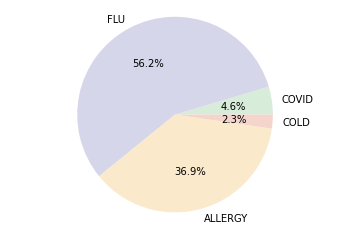

In [8]:
data = [covid_df.shape[0],flu_df.shape[0],allergy_df.shape[0],cold_df.shape[0]]

fig1, ax1 = plt.subplots()
colors = ( "#d7ecd9","#d5d6ea","#faeacb", "#f5d5cb") 
ax1.pie(data, colors = colors,labels=['COVID', 'FLU', 'ALLERGY', 'COLD'],autopct='%1.1f%%',)
ax1.axis('equal')  
plt.show()


### Covid data hist

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002383F4A1A58>,
      dtype=object)

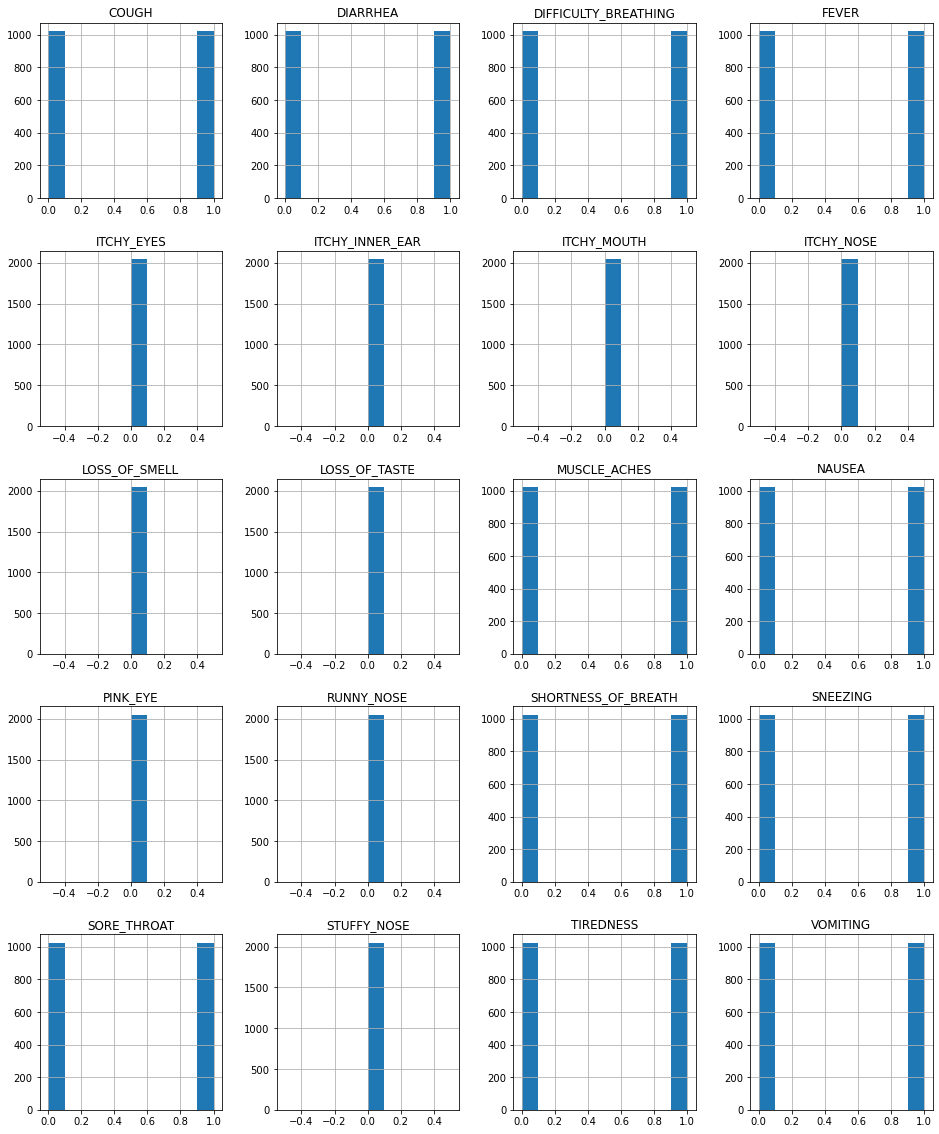

In [9]:
covid_df.hist(figsize=(16, 20))

### Flu data hist 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002383FAF60B8>,
      dtype=object)

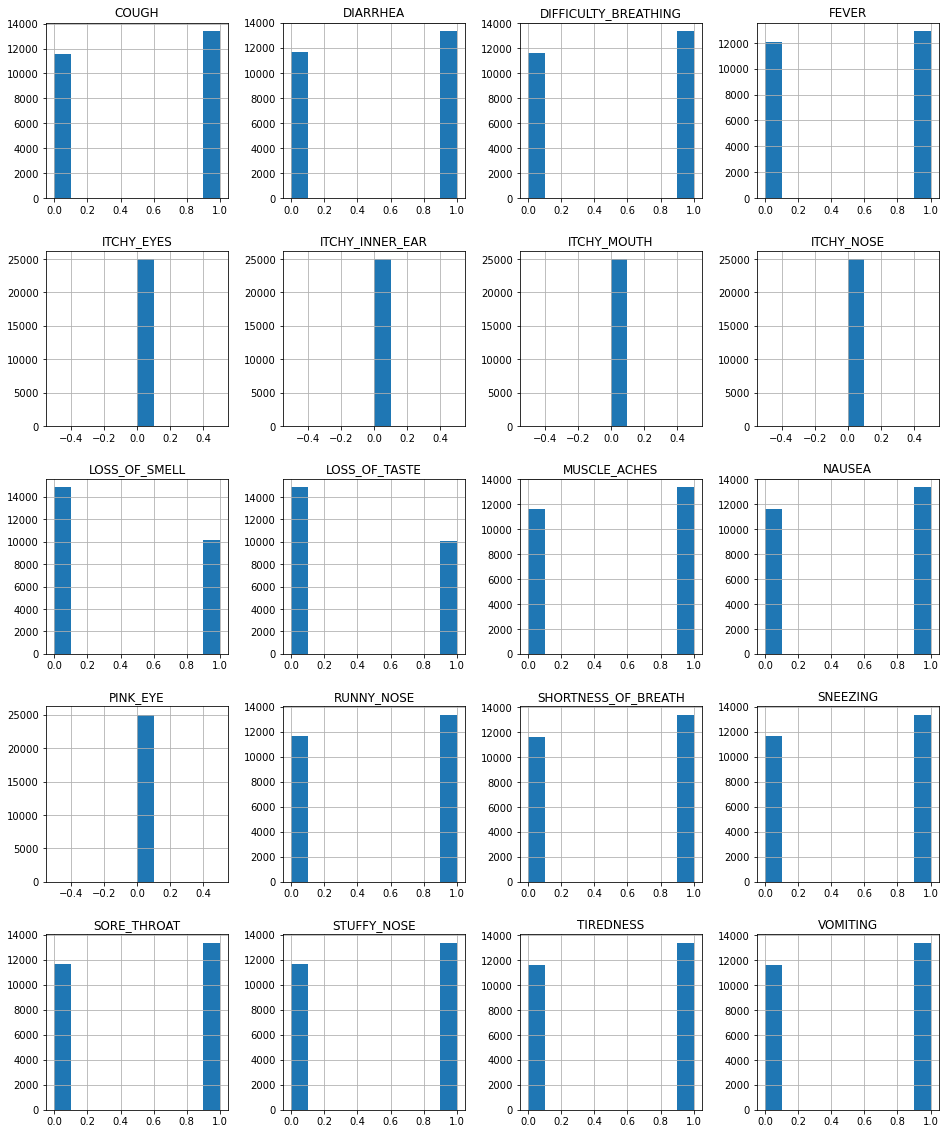

In [10]:
flu_df.hist(figsize=(16, 20))

### Allergy data hist 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002384279DEB8>,
      dtype=object)

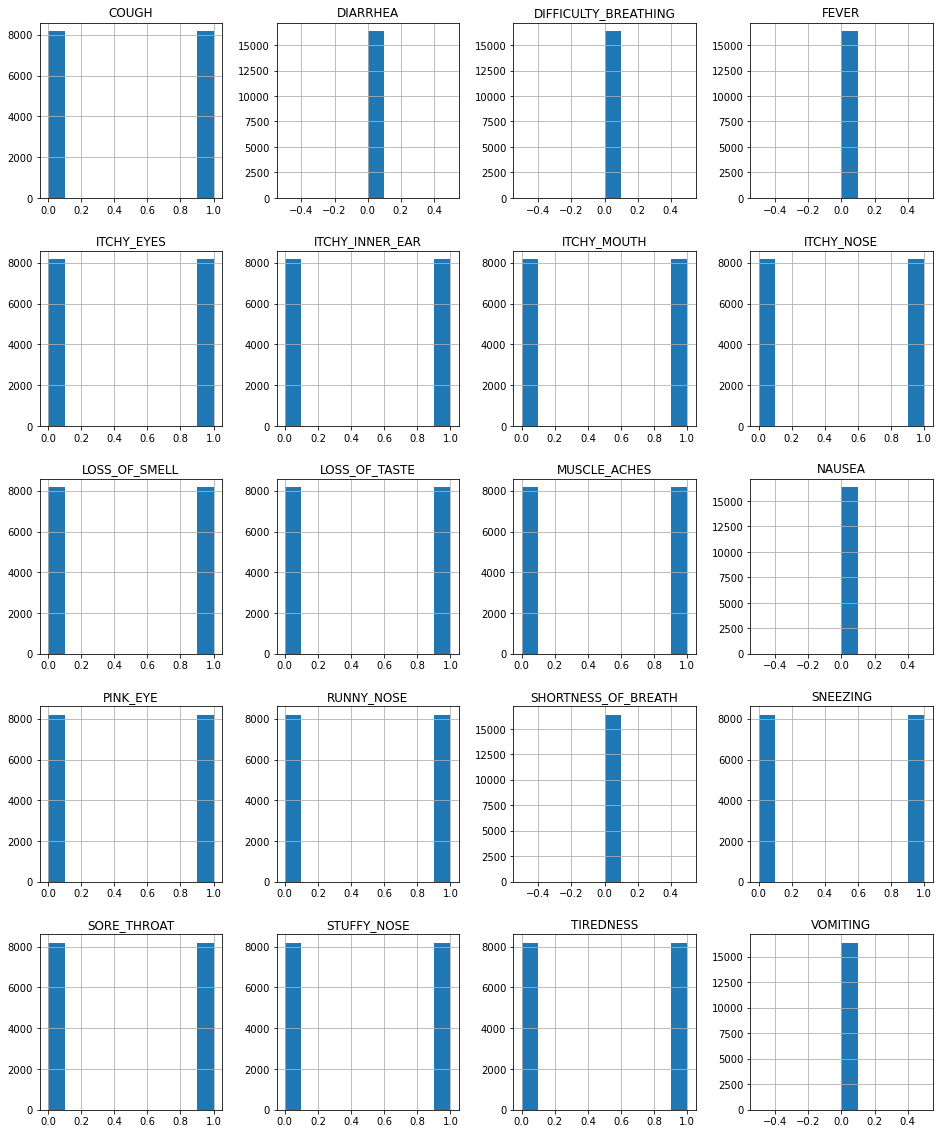

In [11]:
allergy_df.hist(figsize=(16, 20))

### Cold data hist

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000238424CCD68>,
      dtype=object)

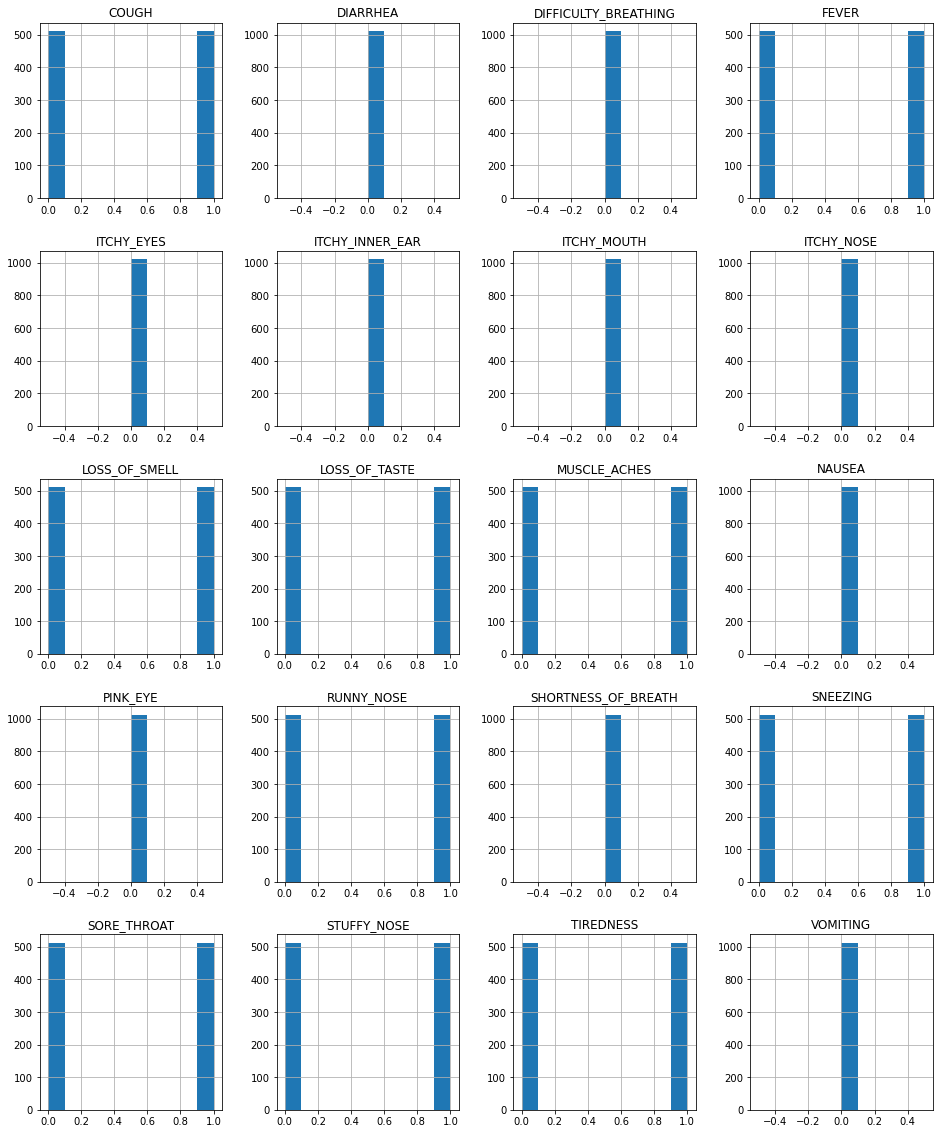

In [12]:
cold_df.hist(figsize=(16, 20))

## Data Preprocessing

**Treat type as categorical data**

In [4]:
df['TYPE'] = df['TYPE'].astype('category')

**Undersampling and oversampling**

In [5]:
undersampled_df = pd.concat([cold_df, 
    covid_df.sample(n=1024, random_state=1), 
    allergy_df.sample(n=1024, random_state=1), 
    flu_df.sample(n=1024, random_state=1)])

oversampled_df = pd.concat([cold_df.sample(n=25000, replace=True, random_state=1), 
    covid_df.sample(n=25000, replace=True, random_state=1), 
    allergy_df.sample(n=25000, replace=True, random_state=1), 
    flu_df])


In [6]:
input_names = list(df.columns)
input_names.remove('TYPE')

all_inputs = df[input_names].values
all_labels = df['TYPE'].values

undersampled_inputs = undersampled_df[input_names].values
undersampled_labels = undersampled_df['TYPE'].values

oversampled_inputs = oversampled_df[input_names].values
oversampled_labels = oversampled_df['TYPE'].values

**Train and test split data**

In [7]:
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify=all_labels)

(u_training_inputs,
 u_testing_inputs,
 u_training_classes,
 u_testing_classes) = train_test_split(undersampled_inputs, undersampled_labels, test_size=0.25, random_state=1, stratify=undersampled_labels)

(o_training_inputs,
 o_testing_inputs,
 o_training_classes,
 o_testing_classes) = train_test_split(oversampled_inputs, oversampled_labels, test_size=0.25, random_state=1, stratify=oversampled_labels)

**Scaler**

In [8]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()

scaler.fit(training_inputs)
training_inputs = scaler.transform(training_inputs)
testing_inputs = scaler.transform(testing_inputs) 

scaler.fit(u_training_inputs)
u_training_inputs = scaler.transform(u_training_inputs)
u_testing_inputs = scaler.transform(u_testing_inputs) 

scaler.fit(o_training_inputs)
o_training_inputs = scaler.transform(o_training_inputs)
o_testing_inputs = scaler.transform(o_testing_inputs) 

## Supervised Learning

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

### Decision Tree Classifier

For Original dataset, Undersampled dataset and Oversampled dataset

In [10]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier()

decision_tree_classifier.fit(training_inputs, training_classes)
dtc_all_predictions = decision_tree_classifier.predict(testing_inputs)

decision_tree_classifier.fit(u_training_inputs, u_training_classes)
dtc_under_predictions = decision_tree_classifier.predict(u_testing_inputs)

decision_tree_classifier.fit(o_training_inputs, o_training_classes)
dtc_over_predictions = decision_tree_classifier.predict(o_testing_inputs)

dtc_all_report = classification_report(testing_classes, dtc_all_predictions, output_dict=True)
dtc_under_report = classification_report(u_testing_classes, dtc_under_predictions, output_dict=True)
dtc_over_report = classification_report(o_testing_classes, dtc_over_predictions, output_dict=True)

print("Original dataset:\n", classification_report(testing_classes, dtc_all_predictions))
print("Undersampled dataset:\n", classification_report(u_testing_classes, dtc_under_predictions))
print("Oversampled dataset:\n", classification_report(o_testing_classes, dtc_over_predictions))

Original dataset:
               precision    recall  f1-score   support

     ALLERGY       0.96      0.97      0.96      4096
        COLD       0.30      0.30      0.30       256
       COVID       0.18      0.20      0.19       512
         FLU       0.93      0.91      0.92      6250

    accuracy                           0.89     11114
   macro avg       0.59      0.60      0.59     11114
weighted avg       0.89      0.89      0.89     11114

Undersampled dataset:
               precision    recall  f1-score   support

     ALLERGY       0.93      0.97      0.95       256
        COLD       0.94      0.86      0.90       256
       COVID       0.86      0.89      0.87       256
         FLU       0.89      0.89      0.89       256

    accuracy                           0.90      1024
   macro avg       0.90      0.90      0.90      1024
weighted avg       0.90      0.90      0.90      1024

Oversampled dataset:
               precision    recall  f1-score   support

     ALLERG

### Support Vector Machines

For Original dataset, Undersampled dataset and Oversampled dataset

In [11]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(training_inputs, training_classes)
svc_all_predictions = svc.predict(testing_inputs)

svc.fit(u_training_inputs, u_training_classes)
svc_under_predictions = svc.predict(u_testing_inputs)

svc.fit(o_training_inputs, o_training_classes)
svc_over_predictions = svc.predict(o_testing_inputs)

svc_all_report = classification_report(testing_classes, svc_all_predictions, output_dict=True)
svc_under_report = classification_report(u_testing_classes, svc_under_predictions, output_dict=True)
svc_over_report = classification_report(o_testing_classes, svc_over_predictions, output_dict=True)

print("Original dataset:\n", classification_report(testing_classes, svc_all_predictions))
print("Undersampled dataset:\n", classification_report(u_testing_classes, svc_under_predictions))
print("Oversampled dataset:\n", classification_report(o_testing_classes, svc_over_predictions))

Original dataset:
               precision    recall  f1-score   support

     ALLERGY       0.95      0.99      0.97      4096
        COLD       0.57      0.46      0.51       256
       COVID       0.40      0.42      0.41       512
         FLU       0.95      0.93      0.94      6250

    accuracy                           0.92     11114
   macro avg       0.72      0.70      0.71     11114
weighted avg       0.92      0.92      0.92     11114

Undersampled dataset:
               precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.99       256
        COLD       0.94      1.00      0.97       256
       COVID       0.91      0.97      0.94       256
         FLU       1.00      0.89      0.94       256

    accuracy                           0.96      1024
   macro avg       0.96      0.96      0.96      1024
weighted avg       0.96      0.96      0.96      1024

Oversampled dataset:
               precision    recall  f1-score   support

     ALLERG

### K-Nearest Neighbors

For Original dataset, Undersampled dataset and Oversampled dataset

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(training_inputs, training_classes)
knn_all_predictions = knn.predict(testing_inputs)

knn.fit(u_training_inputs, u_training_classes)
knn_under_predictions = knn.predict(u_testing_inputs)

knn.fit(o_training_inputs, o_training_classes)
knn_over_predictions = knn.predict(o_testing_inputs)

knn_all_report = classification_report(testing_classes, knn_all_predictions, output_dict=True)
knn_under_report = classification_report(u_testing_classes, knn_under_predictions, output_dict=True)
knn_over_report = classification_report(o_testing_classes, knn_over_predictions, output_dict=True)

print("Original dataset:\n", classification_report(testing_classes, knn_all_predictions))
print("Undersampled dataset:\n", classification_report(u_testing_classes, knn_under_predictions))
print("Oversampled dataset:\n", classification_report(o_testing_classes, knn_over_predictions))

Original dataset:
               precision    recall  f1-score   support

     ALLERGY       0.96      0.98      0.97      4096
        COLD       0.44      0.45      0.45       256
       COVID       0.11      0.04      0.05       512
         FLU       0.92      0.96      0.94      6250

    accuracy                           0.91     11114
   macro avg       0.61      0.61      0.60     11114
weighted avg       0.89      0.91      0.90     11114

Undersampled dataset:
               precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.99       256
        COLD       0.88      0.97      0.93       256
       COVID       0.75      0.98      0.85       256
         FLU       1.00      0.62      0.76       256

    accuracy                           0.89      1024
   macro avg       0.91      0.89      0.88      1024
weighted avg       0.91      0.89      0.88      1024

Oversampled dataset:
               precision    recall  f1-score   support

     ALLERG

### Neural Networks

For Original dataset, Undersampled dataset and Oversampled dataset

In [13]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier()

nn.fit(training_inputs, training_classes)
nn_all_predictions = nn.predict(testing_inputs)

nn.fit(u_training_inputs, u_training_classes)
nn_under_predictions = nn.predict(u_testing_inputs)

nn.fit(o_training_inputs, o_training_classes)
nn_over_predictions = nn.predict(o_testing_inputs)

nn_all_report = classification_report(testing_classes, nn_all_predictions, output_dict=True)
nn_under_report = classification_report(u_testing_classes, nn_under_predictions, output_dict=True)
nn_over_report = classification_report(o_testing_classes, nn_over_predictions, output_dict=True)

print("Original dataset:\n",classification_report(testing_classes, nn_all_predictions))
print("Undersampled dataset:\n", classification_report(u_testing_classes, nn_under_predictions))
print("Oversampled dataset:\n", classification_report(o_testing_classes, nn_over_predictions))

C:\Users\ineso\Anaconda2\envs\py36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
Original dataset:
               precision    recall  f1-score   support

     ALLERGY       0.97      0.97      0.97      4096
        COLD       0.44      0.40      0.42       256
       COVID       0.34      0.41      0.37       512
         FLU       0.94      0.92      0.93      6250

    accuracy                           0.91     11114
   macro avg       0.67      0.68      0.67     11114
weighted avg       0.91      0.91      0.91     11114

Undersampled dataset:
               precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.98       256
        COLD       0.94      0.96      0.95       256
       COVID       0.88      0.98      0.93       256
         FLU       0.99      0.89      0.9

### Comparing algorithms

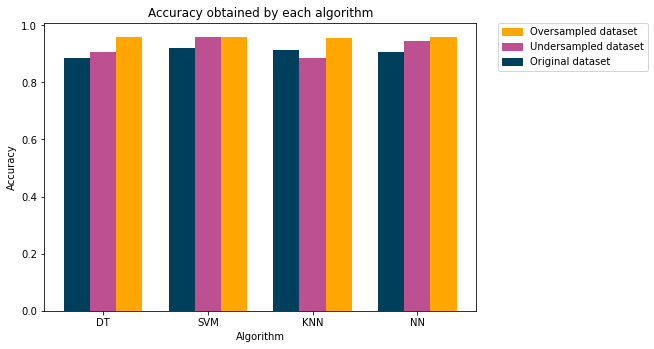

In [23]:
data = [
    [dtc_all_report['accuracy'],svc_all_report['accuracy'],knn_all_report['accuracy'],nn_all_report['accuracy']],
    [dtc_under_report['accuracy'],svc_under_report['accuracy'],knn_under_report['accuracy'],nn_under_report['accuracy']],
    [dtc_over_report['accuracy'],svc_over_report['accuracy'],knn_over_report['accuracy'],nn_over_report['accuracy']]
]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = '#003f5c', width = 0.25)
ax.bar(X + 0.25, data[1], color = '#bc5090', width = 0.25, tick_label=['DT', 'SVM', 'KNN', 'NN'])
ax.bar(X + 0.50, data[2], color = '#ffa600', width = 0.25)

green_patch = mpatches.Patch(color='#ffa600', label='Oversampled dataset')
blue_patch = mpatches.Patch(color='#bc5090', label='Undersampled dataset')
red_patch = mpatches.Patch(color='#003f5c', label='Original dataset')
plt.legend(handles=[green_patch, blue_patch, red_patch], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.title("Accuracy obtained by each algorithm")

plt.show()

Using the obtained classification reports we can also plot the algorithms' performance for each disease type. Here we can clearly see how important the unbalanced data sampling methods were to improve the score for the covid and flu cases, where the algorithms performed poorly when using the original dataset, since there were very few occurences of these diseases.

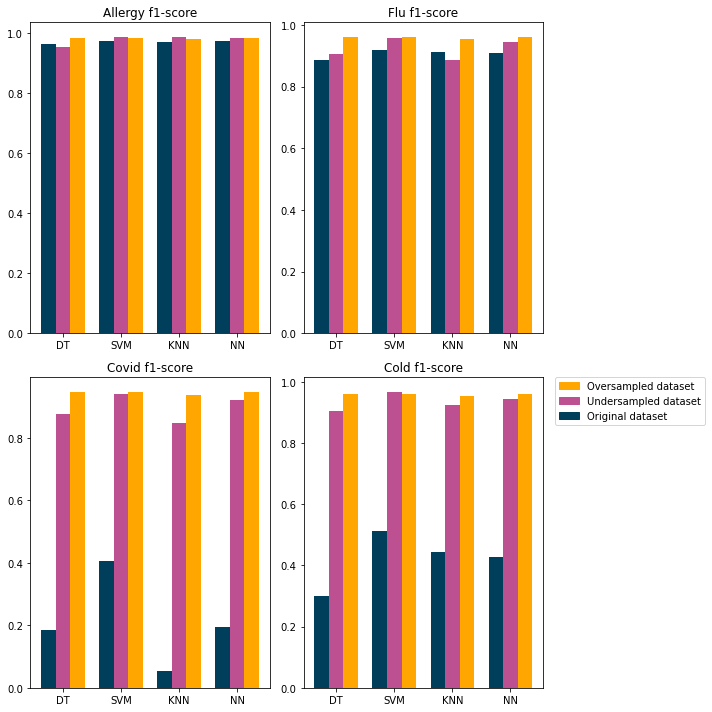

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

allergy_data = [
    [dtc_all_report['ALLERGY']['f1-score'],svc_all_report['ALLERGY']['f1-score'],knn_all_report['ALLERGY']['f1-score'],nn_all_report['ALLERGY']['f1-score']],
    [dtc_under_report['ALLERGY']['f1-score'],svc_under_report['ALLERGY']['f1-score'],knn_under_report['ALLERGY']['f1-score'],nn_under_report['ALLERGY']['f1-score']],
    [dtc_over_report['ALLERGY']['f1-score'],svc_over_report['ALLERGY']['f1-score'],knn_over_report['ALLERGY']['f1-score'],nn_over_report['ALLERGY']['f1-score']]
]
X = np.arange(4)
axs[0, 0].bar(X + 0.00, allergy_data[0], color = '#003f5c', width = 0.25)
axs[0, 0].bar(X + 0.25, allergy_data[1], color = '#bc5090', width = 0.25, tick_label=['DT', 'SVM', 'KNN', 'NN'])
axs[0, 0].bar(X + 0.50, allergy_data[2], color = '#ffa600', width = 0.25)
axs[0, 0].set_title("Allergy f1-score")

flu_data = [
    [dtc_all_report['FLU']['f1-score'],svc_all_report['FLU']['f1-score'],knn_all_report['FLU']['f1-score'],nn_all_report['FLU']['f1-score']],
    [dtc_under_report['FLU']['f1-score'],svc_under_report['FLU']['f1-score'],knn_under_report['FLU']['f1-score'],nn_under_report['FLU']['f1-score']],
    [dtc_over_report['FLU']['f1-score'],svc_over_report['FLU']['f1-score'],knn_over_report['FLU']['f1-score'],nn_over_report['FLU']['f1-score']]
]
X = np.arange(4)
axs[0, 1].bar(X + 0.00, data[0], color = '#003f5c', width = 0.25)
axs[0, 1].bar(X + 0.25, data[1], color = '#bc5090', width = 0.25, tick_label=['DT', 'SVM', 'KNN', 'NN'])
axs[0, 1].bar(X + 0.50, data[2], color = '#ffa600', width = 0.25)
axs[0, 1].set_title("Flu f1-score")

covid_data = [
    [dtc_all_report['COVID']['f1-score'],svc_all_report['COVID']['f1-score'],knn_all_report['COVID']['f1-score'],nn_all_report['COVID']['f1-score']],
    [dtc_under_report['COVID']['f1-score'],svc_under_report['COVID']['f1-score'],knn_under_report['COVID']['f1-score'],nn_under_report['COVID']['f1-score']],
    [dtc_over_report['COVID']['f1-score'],svc_over_report['COVID']['f1-score'],knn_over_report['COVID']['f1-score'],nn_over_report['COVID']['f1-score']]
]
X = np.arange(4)
axs[1, 0].bar(X + 0.00, covid_data[0], color = '#003f5c', width = 0.25)
axs[1, 0].bar(X + 0.25, covid_data[1], color = '#bc5090', width = 0.25, tick_label=['DT', 'SVM', 'KNN', 'NN'])
axs[1, 0].bar(X + 0.50, covid_data[2], color = '#ffa600', width = 0.25)
axs[1, 0].set_title("Covid f1-score")

cold_data = [
    [dtc_all_report['COLD']['f1-score'],svc_all_report['COLD']['f1-score'],knn_all_report['COLD']['f1-score'],nn_all_report['COLD']['f1-score']],
    [dtc_under_report['COLD']['f1-score'],svc_under_report['COLD']['f1-score'],knn_under_report['COLD']['f1-score'],nn_under_report['COLD']['f1-score']],
    [dtc_over_report['COLD']['f1-score'],svc_over_report['COLD']['f1-score'],knn_over_report['COLD']['f1-score'],nn_over_report['COLD']['f1-score']]
]
X = np.arange(4)
axs[1, 1].bar(X + 0.00, cold_data[0], color = '#003f5c', width = 0.25)
axs[1, 1].bar(X + 0.25, cold_data[1], color = '#bc5090', width = 0.25, tick_label=['DT', 'SVM', 'KNN', 'NN'])
axs[1, 1].bar(X + 0.50, cold_data[2], color = '#ffa600', width = 0.25)
axs[1, 1].set_title("Cold f1-score")

green_patch = mpatches.Patch(color='#ffa600', label='Oversampled dataset')
blue_patch = mpatches.Patch(color='#bc5090', label='Undersampled dataset')
red_patch = mpatches.Patch(color='#003f5c', label='Original dataset')
plt.legend(handles=[green_patch, blue_patch, red_patch], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

fig.tight_layout()
plt.show()


## Parameter Tuning using GridSearchCV

In [14]:
from sklearn.model_selection import GridSearchCV

In [26]:
dtc_param_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [13, 14, 15, 16, 17],
                  'max_features': [10, 11, 12, 13, 14],
                  'class_weight' : [None, {'ALLERGY':1, 'FLU':1, 'COVID':1, 'COLD':2}]}

dtc_grid_search = GridSearchCV(DecisionTreeClassifier(),
                           param_grid=dtc_param_grid,
                           cv=10,
                           verbose=3)

dtc_grid_search.fit(oversampled_inputs, oversampled_labels)
print('Best score: {}'.format(dtc_grid_search.best_score_))
print('Best parameters: {}'.format(dtc_grid_search.best_params_))
print('Best estimator: {}'.format(dtc_grid_search.best_estimator_))

: 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=13, splitter=random; total time=   0.5s
[CV 9/10] END class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=13, splitter=random; total time=   0.7s
[CV 10/10] END class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=13, splitter=random; total time=   0.6s
[CV 1/10] END class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=14, splitter=best; total time=   0.6s
[CV 2/10] END class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=14, splitter=best; total time=   0.5s
[CV 3/10] END class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=14, splitter=best; total time=   0.4s
[CV 4/10] END class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entrop

In [ ]:
svc_param_grid = {'C' : [0.1, 1, 10, 100], 
            'gamma' : [1, 0.1, 0.01],
            'kernel': ['rbf', 'sigmoid']}

svc_grid_search = GridSearchCV(SVC(),
                           param_grid=svc_param_grid,
                           cv=5,
                           verbose=3)

svc_grid_search.fit(oversampled_inputs, oversampled_labels)
print('Best score: {}'.format(svc_grid_search.best_score_))
print('Best parameters: {}'.format(svc_grid_search.best_params_))
print('Best estimator: {}'.format(svc_grid_search.best_estimator_))

In [ ]:
linear_svc_param_grid = {'C' : [0.1, 0.5, 1, 10, 100],
            'kernel': ['linear']}

linear_svc_grid_search = GridSearchCV(SVC(),
                           param_grid=linear_svc_param_grid,
                           cv=5,
                           verbose=3)

linear_svc_grid_search.fit(oversampled_inputs, oversampled_labels)
print('Best score: {}'.format(linear_svc_grid_search.best_score_))
print('Best parameters: {}'.format(linear_svc_grid_search.best_params_))
print('Best estimator: {}'.format(linear_svc_grid_search.best_estimator_))

In [ ]:
knn_param_grid = {'n_neighbors': [4, 5, 6, 7, 8, 9, 19],
                  'weights': ['uniform', 'distance'],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

knn_grid_search = GridSearchCV(KNeighborsClassifier(),
                           param_grid=knn_parameter_grid,
                           cv=10)

vgrid_search.fit(oversampled_inputs, oversampled_labels)
print('Best score: {}'.format(knn_grid_search.best_score_))
print('Best parameters: {}'.format(knn_grid_search.best_params_))
print('Best estimator: {}'.format(knn_grid_search.best_estimator_))

In [ ]:
nn_param_grid = {'solver': ['adam'],
    'activation' : ['tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01], 
    'hidden_layer_sizes': [10, 50, 100],
    'max_iter' : [500]}

nn_grid_search = GridSearchCV(MLPClassifier(), 
                        param_grid=nn_param_grid, 
                        cv=5,
                        verbose=3)

nn_grid_search.fit(oversampled_inputs, oversampled_labels)
print('Best score: {}'.format(nn_grid_search.best_score_))
print('Best parameters: {}'.format(nn_grid_search.best_params_))
print('Best estimator: {}'.format(nn_grid_search.best_estimator_))

## Conclusions